# Part I - Prosper Loan Data: Exploratory Analysis
## by Chinelo Cynthia Ezenwafor

## Table of Contents

* [Introduction](#Introduction) 

* [Preliminary Wrangling](#Preliminary_Wrangling) 

* [Data Assessment](#Data_Assessment) 

* [Data Cleaning](#Data_Cleaning)  

* [Univariate Exploration](#Univariate_Exploration)

* [Bivariate Exploration](#Bivariate_Exploration)

* [Multivariate Exploration](#Multivariate_Exploration) 

* [Conclusion](#Conclusion)




<a id = 'Introduction'></a>
## Introduction
> The prosper loan dataset contains information about 120,000 loaners that patronise prosper loans. It contains information stored in 81 variables about these customers. Data dictionary to undertsand the variables more can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

<a id = 'Preliminary_Wrangling'></a>
## Preliminary Wrangling

> We start by importing the dataset and then reading it to a pandas dataframe

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv ('prosperLoanData.csv')

In [3]:
print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> The dataset has 113937 rows and 81 columns

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are about 14 features in the dataset that will support my investigation. They include;

> * LoanOriginationDate: The date the loan was originated.
> * Term: The length of the loan expressed in months. 
> * BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
> * ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009..
> * ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
> * BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
> * EmploymentStatus: The employment status of the borrower at the time they posted the listing.
> * IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
> * DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
> * IncomeRange: The income range of the borrower at the time the listing was created.
> * EmploymentStatusDuration: The length in months of the employment status at the time the listing was created.. 
> * LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket..
> * LoanOriginalAmount: The origination amount of the loan.
> * StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

In [4]:
columns = ['LoanOriginationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState',
        'EmploymentStatus', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'IncomeRange','LoanOriginalAmount']
df[columns].sample(10)

,LoanOriginationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount
46617,2011-10-12 00:00:00,36,Current,0.13413,A,1,FL,Full-time,74.0,4500.000000,True,0.21,"$50,000-74,999",7000
74522,2013-05-13 00:00:00,36,Current,0.30285,E,1,TX,Self-employed,111.0,4166.666667,False,NaN,"$50,000-74,999",4000
62349,2013-10-08 00:00:00,36,Current,0.18479,B,1,CA,Employed,304.0,4166.666667,False,0.16,"$50,000-74,999",4000
39737,2012-10-30 00:00:00,36,Current,0.31790,E,1,IL,Employed,86.0,7083.333333,True,0.39,"$75,000-99,999",8000
33262,2007-05-15 00:00:00,36,Completed,0.15713,NaN,0,NC,Full-time,68.0,0.083333,False,10.01,"$1-24,999",5000
34842,2012-07-25 00:00:00,36,Current,0.19921,B,19,TN,Employed,304.0,4754.416667,True,0.18,"$50,000-74,999",3000
72209,2013-07-23 00:00:00,60,Current,0.20593,B,1,MI,Employed,188.0,3583.333333,True,0.19,"$25,000-49,999",10000
84911,2013-07-24 00:00:00,36,Current,0.23939,C,2,NY,Employed,134.0,9166.666667,True,0.31,"$100,000+",15000
30782,2013-06-18 00:00:00,60,Current,0.17061,B,14,NY,Employed,241.0,4166.666667,False,0.24,"$50,000-74,999",8000
84051,2013-04-08 00:00:00,60,Current,0.15629,A,1,MN,Employed,352.0,7500.000000,True,0.30,"$75,000-99,999",12000


In [5]:
loan = df[columns]
print(loan.shape)

(113937, 14)


<a id = 'Data_Assessment'></a>
## Data Assessment

Here, we assess our dataset for findings on quality and tidiness issues.

In [6]:
# visually assess parts of the datafram
loan.sample(10)

,LoanOriginationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount
29879,2008-08-26 00:00:00,36,Defaulted,0.37402,NaN,1,NJ,Full-time,225.0,4166.666667,False,0.30,"$50,000-74,999",2500
69295,2013-10-21 00:00:00,36,Current,0.23898,C,1,MN,Employed,3.0,2250.000000,True,0.44,"$25,000-49,999",4000
90836,2008-06-24 00:00:00,36,Completed,0.23757,NaN,4,MA,Full-time,21.0,2666.666667,False,0.36,"$25,000-49,999",6000
55109,2013-11-08 00:00:00,36,Current,0.22108,C,1,WA,Employed,357.0,6666.666667,False,0.11,"$75,000-99,999",15000
56841,2006-12-21 00:00:00,36,Completed,0.18726,NaN,0,NaN,Not available,NaN,6856.000000,False,0.35,Not displayed,3000
111925,2012-12-28 00:00:00,36,Current,0.35797,HR,1,TX,Other,90.0,7333.333333,False,0.12,"$75,000-99,999",2000
105446,2011-12-06 00:00:00,36,Chargedoff,0.29486,D,1,GA,Employed,81.0,2916.666667,True,0.20,"$25,000-49,999",3000
71955,2013-05-16 00:00:00,36,Current,0.23939,C,19,OH,Employed,128.0,6666.666667,True,0.11,"$75,000-99,999",5000
108902,2012-06-11 00:00:00,36,Chargedoff,0.33553,E,13,FL,Employed,93.0,3333.333333,False,0.11,"$25,000-49,999",4000
49076,2013-12-20 00:00:00,36,Current,0.21342,C,1,VA,Employed,47.0,10750.000000,True,0.20,"$100,000+",8500


In [7]:
#check for duplicates
sum(loan.duplicated())

872

In [8]:
# check the datatype of the columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   EmploymentStatusDuration   106312 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  DebtToIncomeRatio          105383 non-null  float64
 12  IncomeRange                113937 non-null  object 
 13  LoanOriginalAmount         11

In [9]:
# assess the dataframe for columns with missing values
loan.isna().sum()

LoanOriginationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
BorrowerState                 5515
EmploymentStatus              2255
EmploymentStatusDuration      7625
StatedMonthlyIncome              0
IsBorrowerHomeowner              0
DebtToIncomeRatio             8554
IncomeRange                      0
LoanOriginalAmount               0
dtype: int64

### Assessment summary

The following issues were detected after programmatically and visually assessing the dataframe;  
   > 1. Some columns were stored as wrong datatypes, for example, LoanOriginationDate should be changed to datetime, ProsperScore and IncomeRange should also be stored as ordered categorical values.  
   > 2. Column name for ListingCategory (numeric) and ProsperRating (Alpha) should be renamed to enhance readability.  
   > 3. The numeric information in ListingCategory (numeric) is ambigous, with the help of the data dictionary, it can be decoded to make it clearer.  
   > 4. Not employed entries in IncomeRange can be changed to $0.  
   > 5. Some columns contain null values; ProsperRating (Alpha) , DebtToIncomeRatio, EmploymentStatusDuration etc.  

<a id = 'Data_Cleaning'></a>
## Data Cleaning

In [10]:
# make a copy of our dataset
clean_loan = loan.copy()

In [11]:
# change the not employed entries in income range to 0
clean_loan.IncomeRange = clean_loan.IncomeRange.str.replace('Not employed', '$0')

#verify changes
assert 'Not employed' not in clean_loan.IncomeRange

In [12]:
#assign the correct datatype to the datetime column
clean_loan['LoanOriginationDate'] = pd.to_datetime(clean_loan['LoanOriginationDate'])

In [13]:
#convert the ProsperScore and IncomeRange columns to ordered categorical values
ordinal_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
               'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for key, value in ordinal_dict.items():
    order = pd.api.types.CategoricalDtype(categories = value, ordered = True)
    clean_loan[key] = clean_loan[key].astype(order)

In [14]:
# confirm the datatypes 
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   BorrowerAPR                113912 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null   category      
 5   ListingCategory (numeric)  113937 non-null  int64         
 6   BorrowerState              108422 non-null  object        
 7   EmploymentStatus           111682 non-null  object        
 8   EmploymentStatusDuration   106312 non-null  float64       
 9   StatedMonthlyIncome        113937 non-null  float64       
 10  IsBorrowerHomeowner        113937 non-null  bool          
 11  DebtToIncomeRatio          105383 non-null  float64 

In [15]:
# rename ListingCategory (numeric) column
clean_loan = clean_loan.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

#Verify result
for col_name in ['ListingCategory', 'ProsperRating']:
    assert col_name in clean_loan.columns

In [16]:
# decoding the ListingCategory column to make it clearer
category = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business',
            4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby & Adoption', 
            9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 
            13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 
            17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

clean_loan.ListingCategory = clean_loan.ListingCategory.map(category)
clean_loan.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### Address the columns with missing values
Borrower APR, ProsperRating and DebtToIncomeRatio are the columns we are focusing on because it is integral to our analysis. However, DebtToIncomeRatio can be null when a borrower is new to the platform or is currently not indebted to the platfrom. Hence, we can ignore the missing values in the column. ClosedDate column also has some missing values, but a debt can only have a closed date if it were cancelled, completed or chargedoff, so we also ignore them.


In [17]:
# columns with null values
nulls = ['BorrowerAPR', 'ProsperRating']

# Estimating the proportion of null values in the dataframe
nulls_count = [clean_loan[col].isnull().sum() for col in nulls]
nulls_prop = sum(nulls_count)/clean_loan.shape[0] * 100
nulls_prop

25.548329339898363

Since the combined percetange is less than 30%, we drop the nulls from the dataframe.

In [18]:
# drop the rows with null values
for col in nulls:
    clean_loan = clean_loan[clean_loan[col].notnull()]
    
#verify results
for col in nulls:
    assert clean_loan[col].notnull().any()

In [19]:
# visually asses the dataframe after the cleaning
clean_loan.sample(20)

,LoanOriginationDate,Term,LoanStatus,BorrowerAPR,ProsperRating,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount
25382,2013-05-22,60,Current,0.19364,B,Business,TX,Employed,65.0,3991.750000,True,0.43,"$25,000-49,999",15000
75865,2014-02-11,36,Current,0.14206,A,Debt Consolidation,NY,Employed,78.0,4583.333333,False,0.23,"$50,000-74,999",13000
63034,2013-06-21,36,Current,0.13138,A,Debt Consolidation,MN,Employed,203.0,3166.666667,False,0.25,"$25,000-49,999",8000
93556,2013-09-27,36,Current,0.14409,A,Debt Consolidation,WI,Employed,117.0,6250.000000,True,0.16,"$75,000-99,999",5000
104223,2012-03-01,60,Current,0.15784,A,Taxes,AR,Employed,48.0,6666.666667,True,0.08,"$75,000-99,999",5000
47482,2012-08-23,60,Current,0.15936,A,Other,IL,Employed,112.0,37500.000000,True,0.08,"$100,000+",20000
30577,2013-08-06,36,Current,0.18214,B,Debt Consolidation,CA,Employed,232.0,3983.333333,True,0.15,"$25,000-49,999",4300
5340,2013-12-10,36,Current,0.14206,A,Debt Consolidation,CA,Employed,92.0,25000.000000,False,0.12,"$100,000+",25000
219,2010-01-25,36,Completed,0.21933,C,Debt Consolidation,NY,Full-time,12.0,12500.000000,False,0.21,"$100,000+",5500
10501,2012-07-17,36,Current,0.19921,B,Household Expenses,AZ,Employed,217.0,3075.000000,False,0.07,"$25,000-49,999",3000


In [20]:
# get the summary statistics of the numerical values in the dataframe
clean_loan.describe()

,Term,BorrowerAPR,EmploymentStatusDuration,StatedMonthlyIncome,DebtToIncomeRatio,LoanOriginalAmount
count,84853.000000,84853.000000,84834.000000,8.485300e+04,77557.000000,84853.000000
mean,42.486135,0.226658,103.055320,5.931175e+03,0.258752,9083.440515
std,11.640346,0.079916,97.078884,8.239944e+03,0.318326,6287.860058
min,12.000000,0.045830,0.000000,0.000000e+00,0.000000,1000.000000
25%,36.000000,0.163280,30.000000,3.434000e+03,0.150000,4000.000000
50%,36.000000,0.219450,74.000000,5.000000e+03,0.220000,7500.000000
75%,60.000000,0.292540,148.000000,7.083333e+03,0.320000,13500.000000
max,60.000000,0.423950,755.000000,1.750003e+06,10.010000,35000.000000


<a id = 'Univariate_Exploration'></a>
## Univariate Exploration


> For the univariate eploration, we start with the numeric variables.

### Question
> What is the distrubution of the Borrower APR in the dataframe

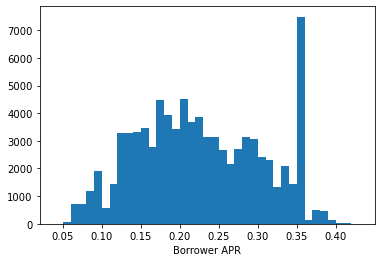

In [21]:
# making a plot
bins = np.arange(0.04, clean_loan['BorrowerAPR'].max()+0.01, 0.01)
plt.hist (data = clean_loan, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR');

### Observation
> Borrower APR is normally distributed and follows a multi-modal mode of distribution. The peaks are around 0.09, 0.15-0.20, with the maximum peak around 0.35-0.36.

### Question
> What is the distrubution of Debt to income ratio in the dataframe

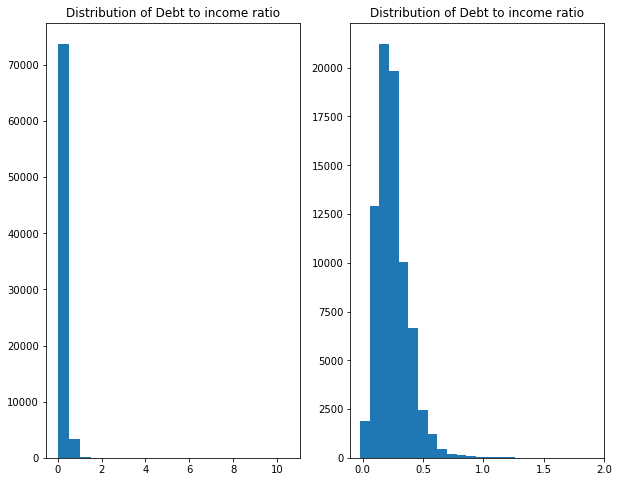

In [22]:
# making a plot
plt.figure (figsize = [10,8])

# for the general distribution
plt.subplot (1,2,1)
bins = np.arange(0.00, clean_loan['DebtToIncomeRatio'].max()+0.5, 0.5)
plt.hist (data = clean_loan, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Distribution of Debt to income ratio');

# zooming in for better comparison
plt.subplot (1,2,2)
bins = np.arange(-0.10, clean_loan['DebtToIncomeRatio'].max()+0.08, 0.08)
plt.hist (data = clean_loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim((-0.1, 2))
plt.title('Distribution of Debt to income ratio');

### Observation
> The histogram is a right skewed unimodal distribution with the peak falling around 0.25. Also, the bulk of the dataset are distributed between 0 and 1. This shows that the majority of the loaners prefer to take loans within their income means.

### Question
> What is the preferred term(duration of loan) most loaners take?
We take the term as a discrete data and plot it on a histogram with non-connected bins.

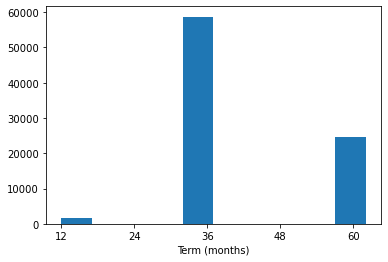

In [23]:
# make  a plot
bins = np.arange(12, clean_loan['Term'].max()+5,5) 
plt.hist (data = clean_loan, x='Term', bins = bins)
plt.xticks(np.arange(12, 61, 12))
plt.xlabel('Term (months)');

### Observation
> Term contains only three unique variables; 12,24 and 36. This is because the Prosper loans only give loans for those specific length of time.
> Majority of the loaners go for the 36-month term,followed by the 60-month term. The 12-month term is the least requested term for loan.

### Question
> What is the distrubution of the income earned by the loaners?

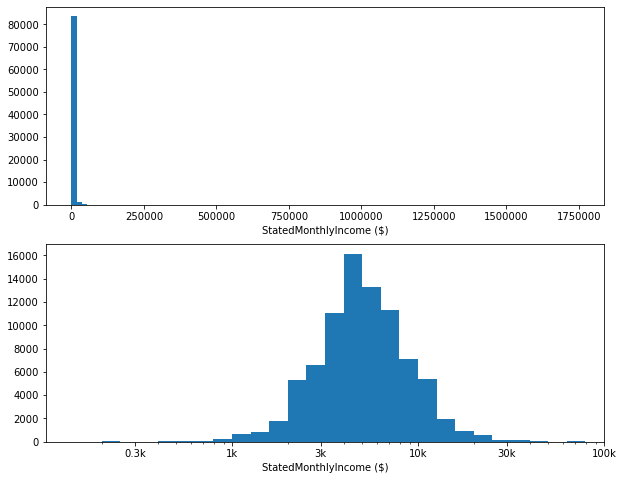

In [24]:
# make a plot
plt.figure(figsize=(10, 8))

# plotting a standard histogram 
plt.subplot(2, 1, 1)
binsize = 1000
bins = np.arange(clean_loan['StatedMonthlyIncome'].min(), clean_loan['StatedMonthlyIncome'].max()+500,500)
plt.ticklabel_format(style = 'plain')
plt.hist(data = clean_loan, x = 'StatedMonthlyIncome', bins = 100)
plt.xlabel('StatedMonthlyIncome ($)');

# making a logarithmic plot
plt.subplot(2, 1, 2)
bins = 10** np.arange(0, np.log10(clean_loan['StatedMonthlyIncome'].max())+0.1, 0.1)
plt.hist(data = clean_loan, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([3e2, 1e3, 3e3, 1e4, 3e4, 1e5], ['0.3k', '1k', '3k', '10k', '30k', '100k'])
#zoom in on the plot
plt.xlim(1e2, 1e5)
plt.xlabel('StatedMonthlyIncome ($)');

### Observation
> From the first plot, it shows a right skewed unimodal distribution. Most of the borrowers were earning between 0-250k. However, much information could not be obtained from the first plot, hence the need for a scale transformation.

> From the second plot, after a log transformation and zooming in on the 0-100k range, we find that majority of the borrowers earn between 3k-10k per month.


### Question
> How is the loan ammount requested by the borrowers distributed?


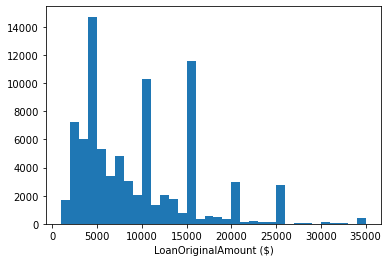

In [25]:
# make a plot
binsize = 1000
bins = np.arange(clean_loan['LoanOriginalAmount'].min(), clean_loan['LoanOriginalAmount'].max()+1000,1000)
plt.hist(data = clean_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)');

### Observation
> The plot shows a multimodal distibution of data. Interestingly, the loan ammounts peak around multiples of 5000; 5k, 10k, 15k etc. Also, majority of the loans taken are below 15k dollars with the most ammount being $5k.

> Next, we explore categorical variables

### Question
> What percentage of the borrowers are home owners? 

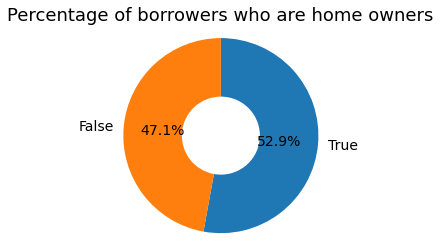

In [26]:
# make a plot
home_owner = clean_loan['IsBorrowerHomeowner'].value_counts()
color = sns.color_palette()[0:1]
plt.pie (home_owner, labels= ['True', 'False'], startangle = 90, counterclock = False, 
         wedgeprops = {'width':0.6}, autopct = '%1.1f%%', textprops={'fontsize':14})
plt.axis('square')
plt.title('Percentage of borrowers who are home owners', fontsize = 18);

### Observation
> About 52.9% of the borrowers are home owners.

### Question
> What is the distribution of prosper ratings among borrowers in the dataset

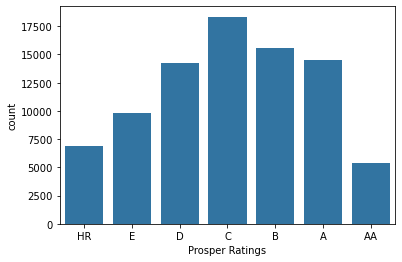

In [27]:
# make a plot
color = sns.color_palette()[0]
sns.countplot(data = clean_loan, x = 'ProsperRating', color = color)
plt.xlabel('Prosper Ratings');

### Observation
> The most common rating is 'C' which is the median rating. Borrowers who have AA ratings; the highest prosper rating, are the least.

### Question
> How are Income range and Employment status distributed among the borrowers

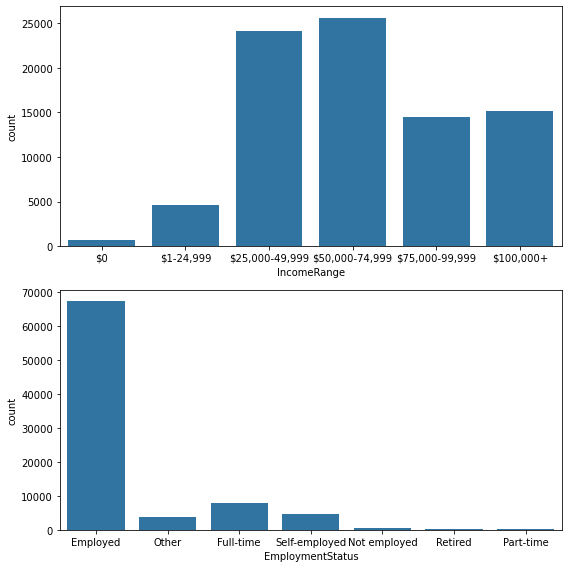

In [28]:
# make a plot
columns = ['IncomeRange', 'EmploymentStatus']

fig,ax = plt.subplots(nrows = 2, figsize=(8,8))

for column, index in zip(columns, range(2)):
    sns.countplot(data = clean_loan, x = clean_loan[column], color = color, ax= ax[index])
plt.tight_layout();

### Observation
> From the income range plot, we see that majority of the borrowers earn between 25,000 to  74,999 per annum. Also, most of the borrowers earn $25k and above with only a few earning below that.

> From the second plot, we can see that most of the borrowers are employed. This makes sense seeing how it would be difficult to get a loan without being employed.

### Question
> Investigate the reasons why borrowers take a loan

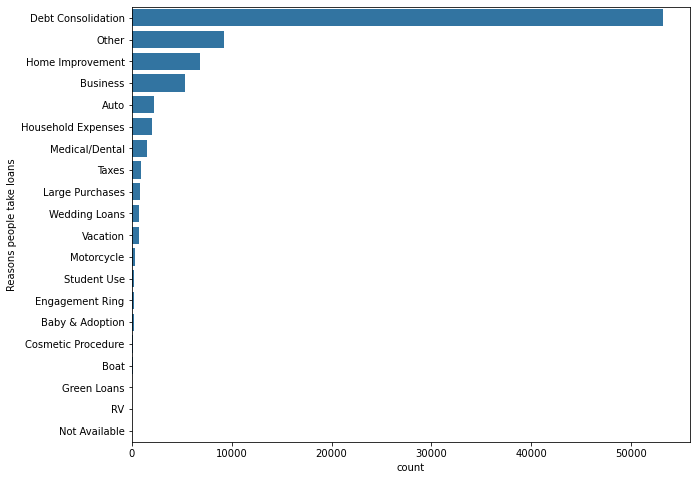

In [29]:
#make a plot
plt.figure(figsize=(10, 8))
order = clean_loan['ListingCategory'].value_counts().index

sns.countplot(data = clean_loan, y = 'ListingCategory', color = color, order = order)
plt.ylabel('Reasons people take loans');

### Observation
> The top most reason people take loans is to pay off existing loans, followed by home imrovement and business.

### Question
> What is the loan status of the borrowers, are people paying off their loans?

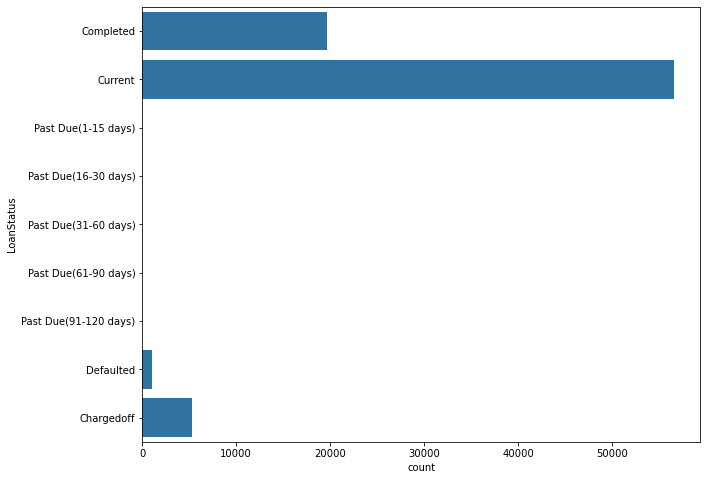

In [39]:
# make a plot
plt.figure(figsize=(10, 8))
order = ['Completed', 'Current', 'Past Due(1-15 days)', 'Past Due(16-30 days)', 'Past Due(31-60 days)', 'Past Due(61-90 days)',
        'Past Due(91-120 days)', 'Defaulted', 'Chargedoff']

sns.countplot(data = clean_loan, y = 'LoanStatus', color = color, order = order)
plt.ylabel('LoanStatus');

### Observation
> Majority of the borrowers are still in debt as most of their status are current, Only a few of them are completed.Some loans are charged off for some reasons, while some are past their due date.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, while plotting a histogram for the 'StatedMonthlyIncome' column, a log transformation had to be done because the variables were distributed over a wide range of values.


<a id = 'Bivariate_Exploration'></a>
## Bivariate Exploration

> Here, we try to look at the variables explored during the univariate exploration and how they are related, focusing on our variables of interest, Borrower APR, Listing Category, debt to income ratio and income range.

> Starting with the relationship between the numeric variables.

### Question
> how do our numeric variables (Term, BorrowerAPR, EmploymentStatusDuration, StatedMonthlyIncome, DebtToIncomeRatio and LoanOriginalAmount) relate? What type of correlation exists among them.

> We would answer these using the plot matrices (pair grid) and correlation matrices (heat map)

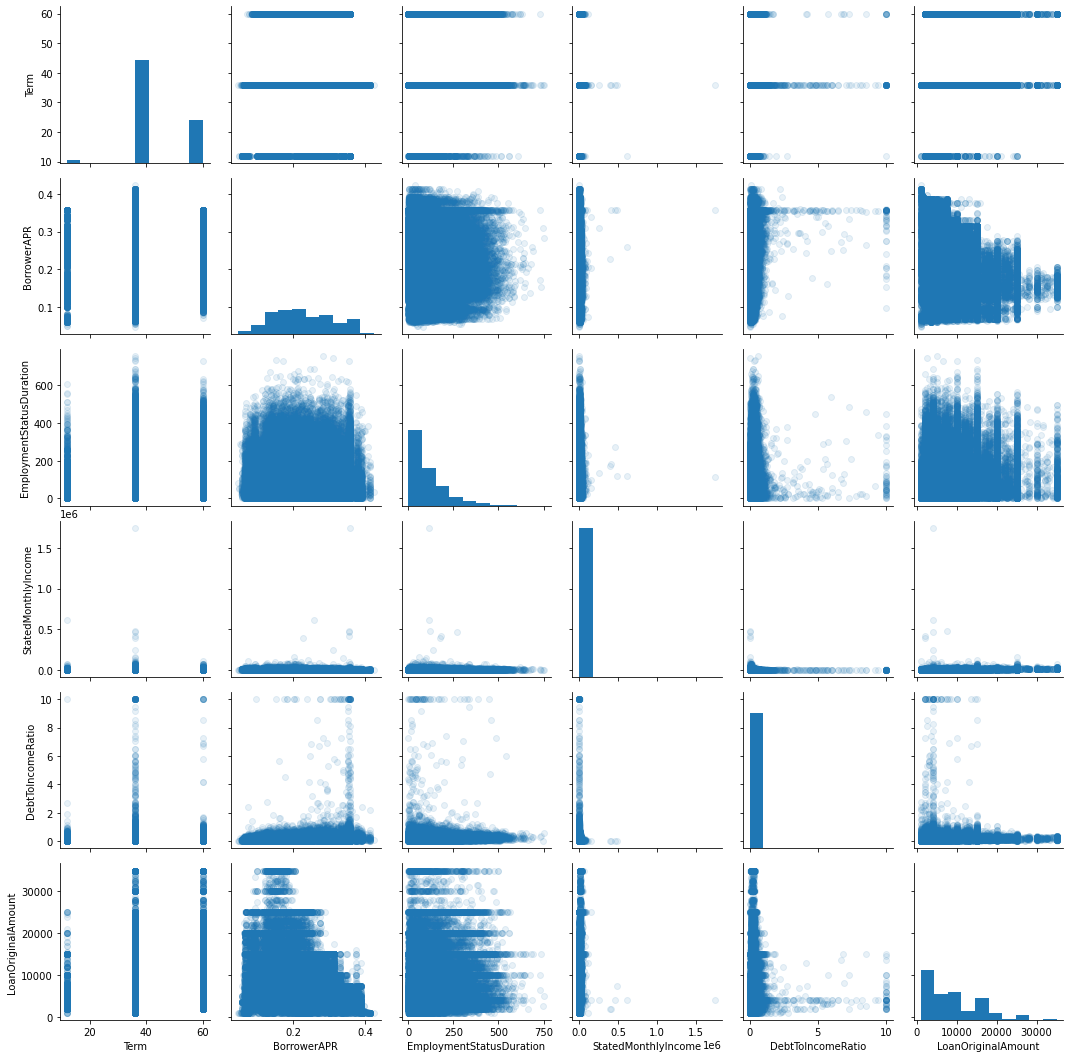

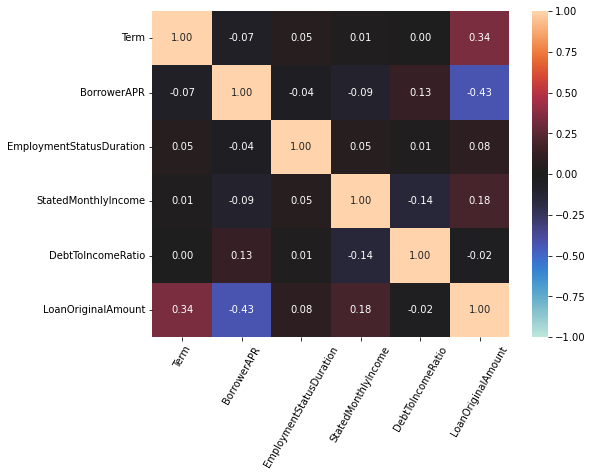

In [31]:
# make the plot
n_vars = ['Term', 'BorrowerAPR', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'LoanOriginalAmount']

# the plot matrix
g = sns.PairGrid(data = clean_loan, vars = n_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.1);

# the correlation matrix
plt.figure(figsize= (8,6))
sns.heatmap(clean_loan[n_vars].corr(), cmap = 'icefire', annot = True, fmt='.2f', vmin=-1, vmax = 1)
plt.xticks(rotation = 60);

### Observation
> There exists a predictable/moderate negative relationship (-0.43) between Borrower APR and loan original ammount. This may be because the higher amount of loan a borrower takes, the lesser the APR on the loan,

> There is a predictable/moderate positive relationship (0.34) between Term and Loan original ammount. This makes sense because the higher the loan taken, the more time a borrower would need to pay back the loan.

> The relationships between other numeric variables appear to be weak or non-significant.

### Question
> The relationship bewteen the numeric variables and the categorical variables

> This would be visualised using the pair grid matrix. From the univariate analysis, we had to zoom in on 0-30k for the stated monthly income and 0-1 for the debt to income ratio, so we do that again for this plot.

> Also, because of the nature of the Term column, it has only three discrete values, we treat it as a categorical variable.

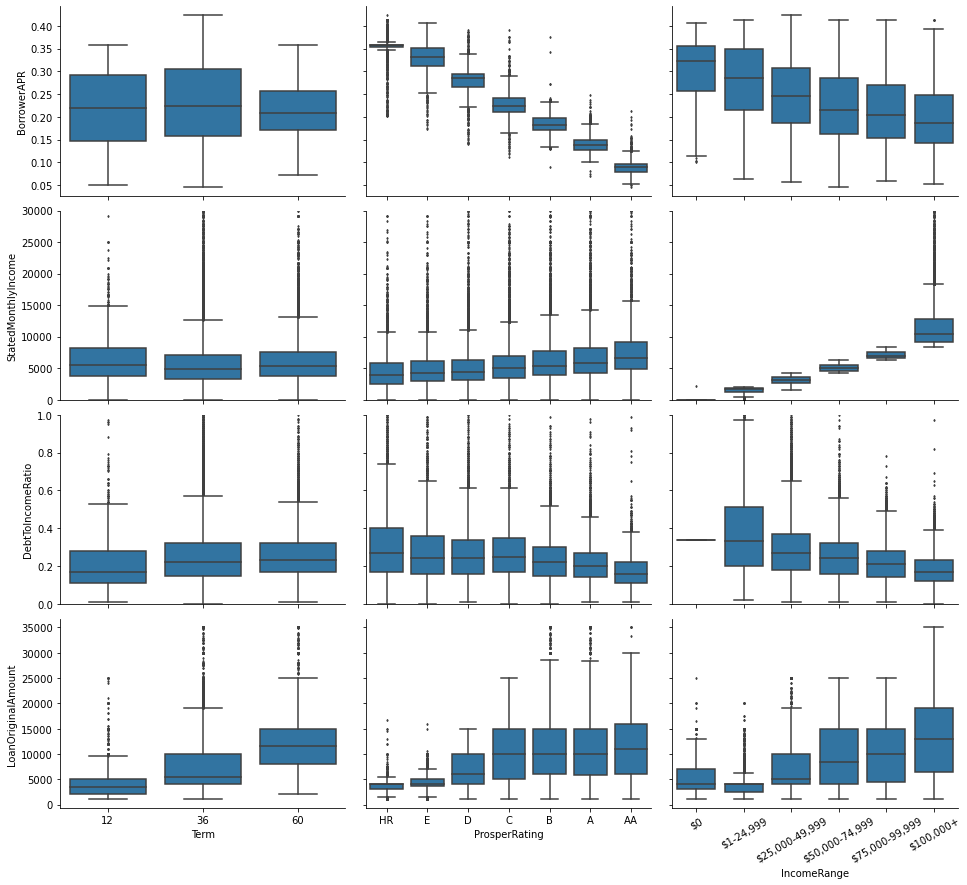

In [32]:
# make a plot
n_vars2 = ['BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'LoanOriginalAmount']
c_vars = ['Term', 'ProsperRating', 'IncomeRange']

# the plot matrix
g = sns.PairGrid(data = clean_loan, y_vars = n_vars2, x_vars = c_vars, aspect=1.5, height = 3)
g.map(sns.boxplot, color = color, fliersize=1.5)

# limit the y axis to 0-30000 for stated monthly income
for ax in g.axes[1, :]:
    ax.set_ylim(0, 30000)

# limit the y axis to 0-1 for debt income ratio
for ax in g.axes[2, :]:
    ax.set_ylim(0, 1)

plt.xticks(rotation=30);

### Observation
> There is an inverse relationship between borrower APR and prosper ratings, borrowers with high ratings tend to have a lower APR on loan taken. Also, high income earners also tend to get lesser APR on loans they take. This shows that high income earners with high prosper ratings tend to get lower interest rates on the platform.

> The positive relationship between stated monthly income and income range is to be expected. We also see a positive relationship between income range and prosper ratings, the higher a borrowers stated monthly income, the higher the likelihood that they get higher ratings on the platform.

> Borrowers with high prosper ratings tend to have a low debt to income ratio while those with low ratings have a high debt to income ratio. This is also true for income range and debt to income ratio, borrowers with high income range have a lower debt to come ratio as opposed to those who do not. 

> Borrowers who take large loans usually go for the 60-month term in order to get enough time to repay the loan. Also, borrowers who take a short term loan (12 and 36 months) tend to get a higher APR when compared to long-term (60 months).  

### Question
> Does being a home owner and employment status have an effect on prosper ratings? 

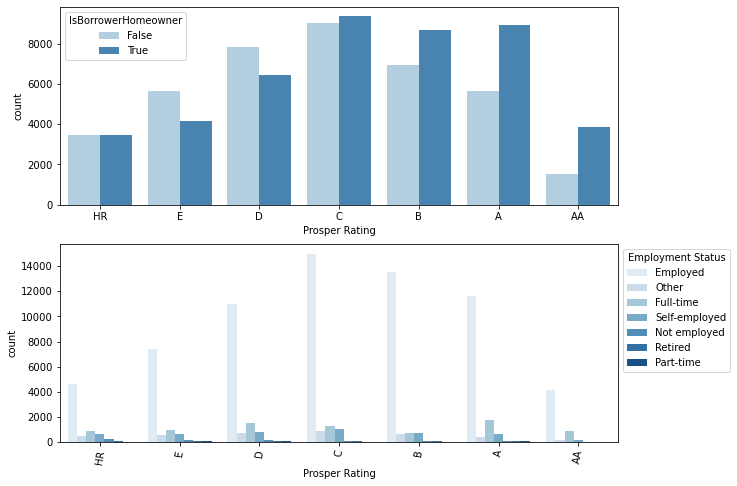

In [33]:
# make a plot
plt.figure(figsize=(10, 8))

# write a function for plotting
def plot_chart(df, x_axis, y_axis, palette):
    sns.countplot (data = clean_loan, x= 'ProsperRating', hue = 'IsBorrowerHomeowner', palette = 'Blues')

plt.subplot(2,1,1)
sns.countplot (data = clean_loan, x= 'ProsperRating', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.xlabel('Prosper Rating');

plt.subplot(2,1,2)
sns.countplot (data = clean_loan, x= 'ProsperRating', hue = 'EmploymentStatus', palette = 'Blues')
plt.xlabel('Prosper Rating')
plt.xticks(rotation = 80)
plt.legend(bbox_to_anchor=(1,1), loc='upper left', title = 'Employment Status');

### Observation
> From the first plot, it can be observed that being a home owner increases the chances of a borrower having a high prosper rating. This could be because a home can be seen as a substantive collateral for loan.

> From the second plot, it can be seen that mainly employed or full-time borrowers get most of the higher ratings(AA, A).

### Summary of the bivariate analysis
> From the analysis, we see that borrower APR has an inverse relationship with Loan original ammount and Prosper ratings. We also see some of the variables that affect prosper ratings such as Is borrower a home owner, employment status and income range. We also see the inverse relationship between debt to income ratio and prosper ratings.

> We perform further multivariate analysis to discover relationships among our features of interest.

<a id = 'Multivariate_Exploration'></a>
## Multivariate Exploration

> Here, we delve further into relationships between multiple variables of interest to establish a pattern.

### Question
> What is the debt to income ration of borrowers as it relates to their loan status and income range?

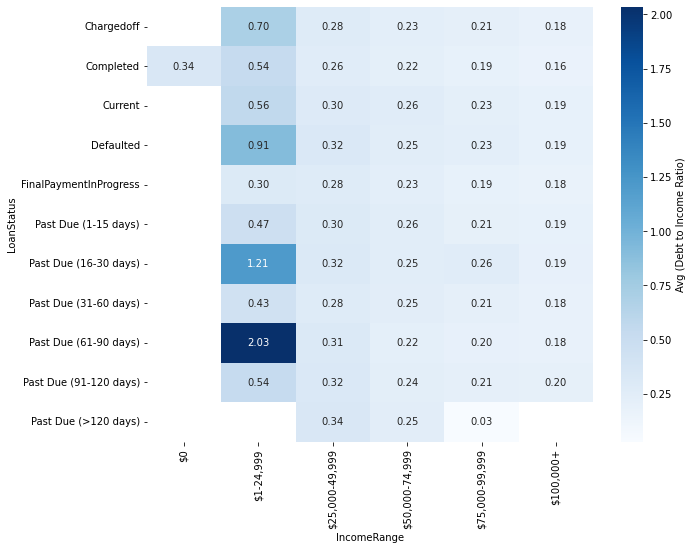

In [34]:
# make a plot
plt.figure(figsize = (10,8))
cat_means = clean_loan.groupby(['IncomeRange', 'LoanStatus']).mean()['DebtToIncomeRatio']
cat_means = cat_means.reset_index(name = 'Avg_of_DebtToIncomeRatio')
cat_means = cat_means.pivot(index = 'LoanStatus', columns = 'IncomeRange', values= 'Avg_of_DebtToIncomeRatio')

sns.heatmap(cat_means, annot = True, fmt ='.2f', cmap = 'Blues', cbar_kws = {'label':'Avg (Debt to Income Ratio)'});

### Observation
> From the plot, it can be obseved that borrowers who earn between 1-24.999k dollars, tend to have high debt to income ratio(>= 0.5), it can also be seen that majority of them are owing loans past their due date. Borrowers who earn from 25k and above, tend to keep their loan appropriate to their income.

### Question
> What is the relationship between Borrower APR, Loan Original ammount and Prosper rating?

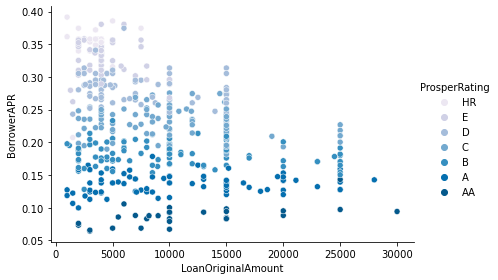

In [35]:
# make a plot
sns.relplot(data = clean_loan.sample(500, random_state = 1), y='BorrowerAPR', x='LoanOriginalAmount', 
            hue ='ProsperRating', palette='PuBu', height = 4, aspect = 1.5);

### Observation
> From the plot, we can observe the relationship between the three variables. Borrowers with high prosper ratings are opportuned to take larger loans at lower interest rates, while borrowers with low prosper ratings take smaller loans but get higher interest rates.

### Observation
> What is the relationship between Prosper rating, loan amount and loan term?

<Figure size 720x576 with 0 Axes>

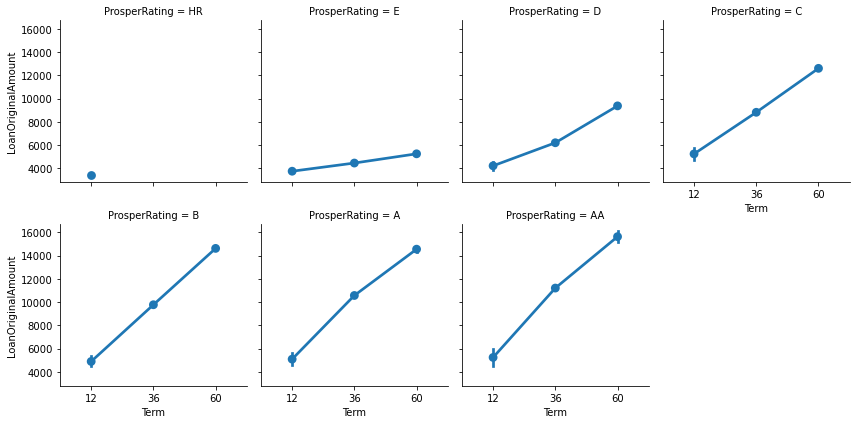

In [36]:
# Make a plot
plt.figure(figsize = (10,8))

g = sns.FacetGrid(data = clean_loan, col='ProsperRating', col_wrap = 4);
g.map(sns.pointplot, 'Term', 'LoanOriginalAmount', order = None);

### Observation
> We can see an upward trend in loan term, borrowers with higher prosper ratings take longer term loans than those with lower ratings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some of the reltionships identified during the bivariate exploration were explored more during the multivariate analysis to gain more insights. 

### Were there any interesting or surprising interactions between features?

> Your answer here!

<a id = 'Conclusion'></a>
## Conclusion
> * From exploring the dataset, it can be observed that there is a negative relationship between borrower APR and features such as Prosper ratings and loan amount. Taking a large amount of loan means a borrower get a lower interest rate as opposedto taking a smaller loan. Also, borrowers who have high prosper ratings tend to get a lower interest rate as opposed to those who do not.

> * It was also observed factors that certain factors can influence a borrower's ratings such as employment status, stated monthly income/income range and debt to income ratio. Borrowers who are home owners, employed and have high income range tend to get higher ratings than others.

> * Some of the reasons why people take a loan was analysed, and it was observed that majority of borrowers take loans to offset previous loans(debt consolidation). Other reasons include; home improvment, buy a car, business, home improvemnt, etc.

> * It can also be observed that most of the borrowers are employed and earn between 25-75k dollars annually. Most borrowers prefer to take loans in multiples of 5000 as well.

> * Also, it can be seen that borrowers who earn between 1-25k dollars tend to take more loans than their income (high debt to income ratio) and are also the most defaulters in paying back their loans. 


In [37]:
# save the dataset for explanatory analysis
clean_loan.to_csv('./Clean_Prosper_loan.csv')

In [38]:
clean_loan.shape

(84853, 14)